In [34]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

In [3]:
import shap

ModuleNotFoundError: No module named 'shap'

In [68]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
df = pd.read_csv('../dataset/실습데이터.csv')
df.head(5)

,Timestamp,OUTPUT_COUNT_DAY_1.xlsx,KO6_MOTOR_SET_FREQ.xlsx,CUTTING_SET_FREQ.xlsx,STATUS.xlsx,KO5_MOTOR_SET_FREQ.xlsx,METAL_OIL_SUPPLY_PRESS_CONTR.xlsx,KO4_MOTOR_SET_FREQ.xlsx,KO2_MOTOR_SET_FREQ.xlsx,MAIN_MOTOR_CURR.xlsx,...,CUTTING_CURR.xlsx,KO5_MOTOR_CURR.xlsx,KO2_MOTOR_CURR.xlsx,KO1_MOTOR_INVERTER_ALM.xlsx,TRANS_POS_DOWN_SET_H.xlsx,OUTPUT_COUNT_DAY_2.xlsx,OUTPUT_COUNT_SUM.xlsx,TRANS_POS_DOWN.xlsx,TRANS_POS_RIGHT.xlsx,MAIN_MOTOR_ALM.xlsx
0,2022-05-02 06:32:33,25878.0,3000.0,3000.0,0.0,3000.0,661.166,3000.0,3000.0,2192.5,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,1741.75,0.0
1,2022-05-02 06:32:34,25878.0,3000.0,3000.0,0.0,3000.0,798.000,3000.0,3000.0,4108.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0
2,2022-05-02 06:32:35,25878.0,3000.0,3000.0,0.0,3000.0,794.000,3000.0,3000.0,4158.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.42,0.0
3,2022-05-02 06:32:36,25878.0,3000.0,3000.0,0.0,3000.0,788.600,3000.0,3000.0,4118.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.50,0.0
4,2022-05-02 06:32:37,25878.0,3000.0,3000.0,0.0,3000.0,804.200,3000.0,3000.0,4063.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0


In [5]:
df.describe

<bound method NDFrame.describe of                    Timestamp  OUTPUT_COUNT_DAY_1.xlsx  \
0       2022-05-02 06:32:33                   25878.0   
1       2022-05-02 06:32:34                   25878.0   
2       2022-05-02 06:32:35                   25878.0   
3       2022-05-02 06:32:36                   25878.0   
4       2022-05-02 06:32:37                   25878.0   
...                      ...                      ...   
579292  2022-05-14 04:34:32                   29160.0   
579293  2022-05-14 04:34:33                   29160.0   
579294  2022-05-14 04:34:39                   29160.0   
579295  2022-05-14 04:34:40                   29160.0   
579296  2022-05-14 04:34:46                   29160.0   

        KO6_MOTOR_SET_FREQ.xlsx  CUTTING_SET_FREQ.xlsx  STATUS.xlsx  \
0                        3000.0                 3000.0          0.0   
1                        3000.0                 3000.0          0.0   
2                        3000.0                 3000.0          0.0 

In [6]:
drop_list = []

for column in df.columns:
    if df[column].nunique() < 2:
        drop_list.append(column)

df.drop(drop_list, axis=1, inplace=True)

In [7]:
df.columns

Index(['Timestamp', 'OUTPUT_COUNT_DAY_1.xlsx', 'KO6_MOTOR_SET_FREQ.xlsx',
       'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx',
       'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx',
       'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx',
       'KO3_MOTOR_SET_FREQ.xlsx', 'TRANS_POS_UP_SET_H.xlsx',
       'TONGS_INVERTER_ALM_ERR_CD.xlsx', 'KO1_MOTOR_SET_FREQ.xlsx',
       'KO3_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_RPM.xlsx',
       'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx',
       'TRANS_POS_LEFT_SET_H.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx',
       'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx',
       'TRANS_POS_UP.xlsx', 'TONGS_POS.xlsx', 'WORK_OIL_SUPPLY_PRESS.xlsx',
       'METAL_TEMP_CONTROL.xlsx', 'TONGS_CAST_CURR.xlsx',
       'CUTTING_INVERTER_ALM_ERR_CD.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx',
       'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_LEFT.xlsx',
       'METAL_OIL_SUPPLY_PRESS_CUT.xlsx', 'MAIN_AIR_PRESS.xlsx',
 

In [8]:
# ③ 컬럼명 정리: 확장자(.xlsx) 제거 (가이드북 지시)
col_list = list(df.columns)
col_list = [c.replace('.xlsx','') for c in col_list]
df.columns = col_list

In [9]:
# ④ 결측치 처리: 이전 타임스탬프 값으로 채움 (forward fill)
# (가이드북: 컬럼별 빈값은 바로 이전 Timestamp 값으로 대체)
df = df.fillna(method='ffill')
df.isna().sum()

Timestamp                       0
OUTPUT_COUNT_DAY_1              0
KO6_MOTOR_SET_FREQ              0
CUTTING_SET_FREQ                0
STATUS                          0
KO5_MOTOR_SET_FREQ              0
METAL_OIL_SUPPLY_PRESS_CONTR    0
KO4_MOTOR_SET_FREQ              0
KO2_MOTOR_SET_FREQ              0
MAIN_MOTOR_CURR                 0
KO3_MOTOR_SET_FREQ              0
TRANS_POS_UP_SET_H              0
TONGS_INVERTER_ALM_ERR_CD       0
KO1_MOTOR_SET_FREQ              0
KO3_MOTOR_INVERTER_ALM          0
MAIN_MOTOR_RPM                  0
TRANS_INVERTER_ALM_ERR_CD       0
TONGS_CAST_SET_FREQ             0
TRANS_POS_LEFT_SET_H            0
KO4_MOTOR_INVERTER_ALM          0
OIL_SUPPLY_PRESS                0
KO2_MOTOR_INVERTER_ALM          0
TRANS_POS_UP                    0
TONGS_POS                       0
WORK_OIL_SUPPLY_PRESS           0
METAL_TEMP_CONTROL              0
TONGS_CAST_CURR                 0
CUTTING_INVERTER_ALM_ERR_CD     0
KO6_MOTOR_INVERTER_ALM          0
TRANS_POS_RIGH

In [10]:
def outlier_iqr(data, column):
    global lower, upper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]

    return int(data1.shape[0]), int(data2.shape[0])

for i in df.columns[2:]:
    n = outlier_iqr(df, i)
    print(f"{i} 컬럼은 총 {n}개의 이상치가 있다. ")

KO6_MOTOR_SET_FREQ 컬럼은 총 (0, 101056)개의 이상치가 있다. 
CUTTING_SET_FREQ 컬럼은 총 (0, 0)개의 이상치가 있다. 
STATUS 컬럼은 총 (0, 106070)개의 이상치가 있다. 
KO5_MOTOR_SET_FREQ 컬럼은 총 (0, 101056)개의 이상치가 있다. 
METAL_OIL_SUPPLY_PRESS_CONTR 컬럼은 총 (1539, 0)개의 이상치가 있다. 
KO4_MOTOR_SET_FREQ 컬럼은 총 (0, 101056)개의 이상치가 있다. 
KO2_MOTOR_SET_FREQ 컬럼은 총 (0, 101056)개의 이상치가 있다. 
MAIN_MOTOR_CURR 컬럼은 총 (76, 17491)개의 이상치가 있다. 
KO3_MOTOR_SET_FREQ 컬럼은 총 (0, 101056)개의 이상치가 있다. 
TRANS_POS_UP_SET_H 컬럼은 총 (0, 101056)개의 이상치가 있다. 
TONGS_INVERTER_ALM_ERR_CD 컬럼은 총 (0, 0)개의 이상치가 있다. 
KO1_MOTOR_SET_FREQ 컬럼은 총 (0, 101056)개의 이상치가 있다. 
KO3_MOTOR_INVERTER_ALM 컬럼은 총 (0, 101056)개의 이상치가 있다. 
MAIN_MOTOR_RPM 컬럼은 총 (0, 104899)개의 이상치가 있다. 
TRANS_INVERTER_ALM_ERR_CD 컬럼은 총 (0, 0)개의 이상치가 있다. 
TONGS_CAST_SET_FREQ 컬럼은 총 (0, 21477)개의 이상치가 있다. 
TRANS_POS_LEFT_SET_H 컬럼은 총 (0, 101056)개의 이상치가 있다. 
KO4_MOTOR_INVERTER_ALM 컬럼은 총 (0, 101056)개의 이상치가 있다. 
OIL_SUPPLY_PRESS 컬럼은 총 (1001, 0)개의 이상치가 있다. 
KO2_MOTOR_INVERTER_ALM 컬럼은 총 (0, 101056)개의 이상치가 있다. 
TRANS_POS_UP 컬럼은 총 (6322

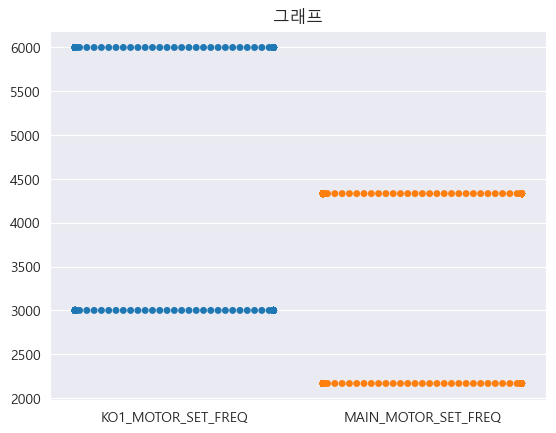

In [69]:
data_temp = df.sample(n=1000)
ax = sns.swarmplot(data=data_temp[['KO1_MOTOR_SET_FREQ', 'MAIN_MOTOR_SET_FREQ']])
plt.title('그래프')
plt.show()

In [11]:
# Timestamp를 문자열에서 datetime으로 변환
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579297 entries, 0 to 579296
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     579297 non-null  datetime64[ns]
 1   OUTPUT_COUNT_DAY_1            579297 non-null  float64       
 2   KO6_MOTOR_SET_FREQ            579297 non-null  float64       
 3   CUTTING_SET_FREQ              579297 non-null  float64       
 4   STATUS                        579297 non-null  float64       
 5   KO5_MOTOR_SET_FREQ            579297 non-null  float64       
 6   METAL_OIL_SUPPLY_PRESS_CONTR  579297 non-null  float64       
 7   KO4_MOTOR_SET_FREQ            579297 non-null  float64       
 8   KO2_MOTOR_SET_FREQ            579297 non-null  float64       
 9   MAIN_MOTOR_CURR               579297 non-null  float64       
 10  KO3_MOTOR_SET_FREQ            579297 non-null  float64       
 11  TRANS_POS_UP_

In [14]:
# ⑥ 이상치(IQR) 확인 함수 (코드6 관련)
def count_iqr_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return len(outliers), lower, upper

# 예시: 모든 수치 컬럼에 대해 이상치 수 집계
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
iqr_summary = {}
for c in num_cols:
    n_out, lo, hi = count_iqr_outliers(df, c)
    iqr_summary[c] = n_out
# 상위 10개 이상치 많은 컬럼 출력
iqr_sorted = sorted(iqr_summary.items(), key=lambda x: x[1], reverse=True)
print("\n이상치 상위 10개 컬럼 (IQR 기준):")
for col, n in iqr_sorted[:10]:
    print(col, n)


이상치 상위 10개 컬럼 (IQR 기준):
KO1_MOTOR_INVERTER_ALM 159358
STATUS 106070
MAIN_MOTOR_RPM 104899
KO6_MOTOR_SET_FREQ 101056
KO5_MOTOR_SET_FREQ 101056
KO4_MOTOR_SET_FREQ 101056
KO2_MOTOR_SET_FREQ 101056
KO3_MOTOR_SET_FREQ 101056
TRANS_POS_UP_SET_H 101056
KO1_MOTOR_SET_FREQ 101056


['OUTPUT_COUNT_DAY_1', 'KO6_MOTOR_SET_FREQ', 'CUTTING_SET_FREQ']


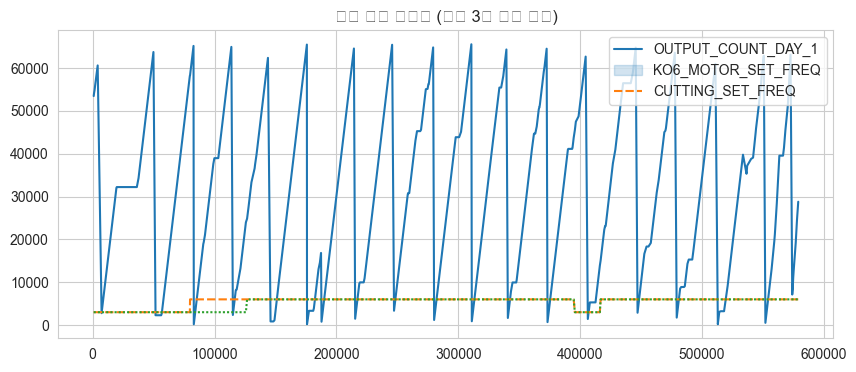

In [15]:
# ⑦ 데이터 트렌드 시각화(샘플 추출) - (코드7 관련)
# 데이터가 커서 샘플 1000개로 시각화
# 데이터셋의 상위 3개 수치형 컬럼에 대한 샘플 데이터의 시간 경과에 따른 트렌드
# 각 라인은 해당 컬럼의 값 변화를 나타내며, 데이터가 시간(Timestamp)에 따라 어떻게 변동하는지 시각적으로 파악 가능
sample = df.sample(n=min(1000, len(df)), random_state=42)
print(num_cols[:3])
plt.figure(figsize=(10,4))
sns.lineplot(data=sample[num_cols[:3]])
plt.title("샘플 변수 트렌드 (상위 3개 수치 컬럼)")
plt.legend(num_cols[:3])
plt.show()

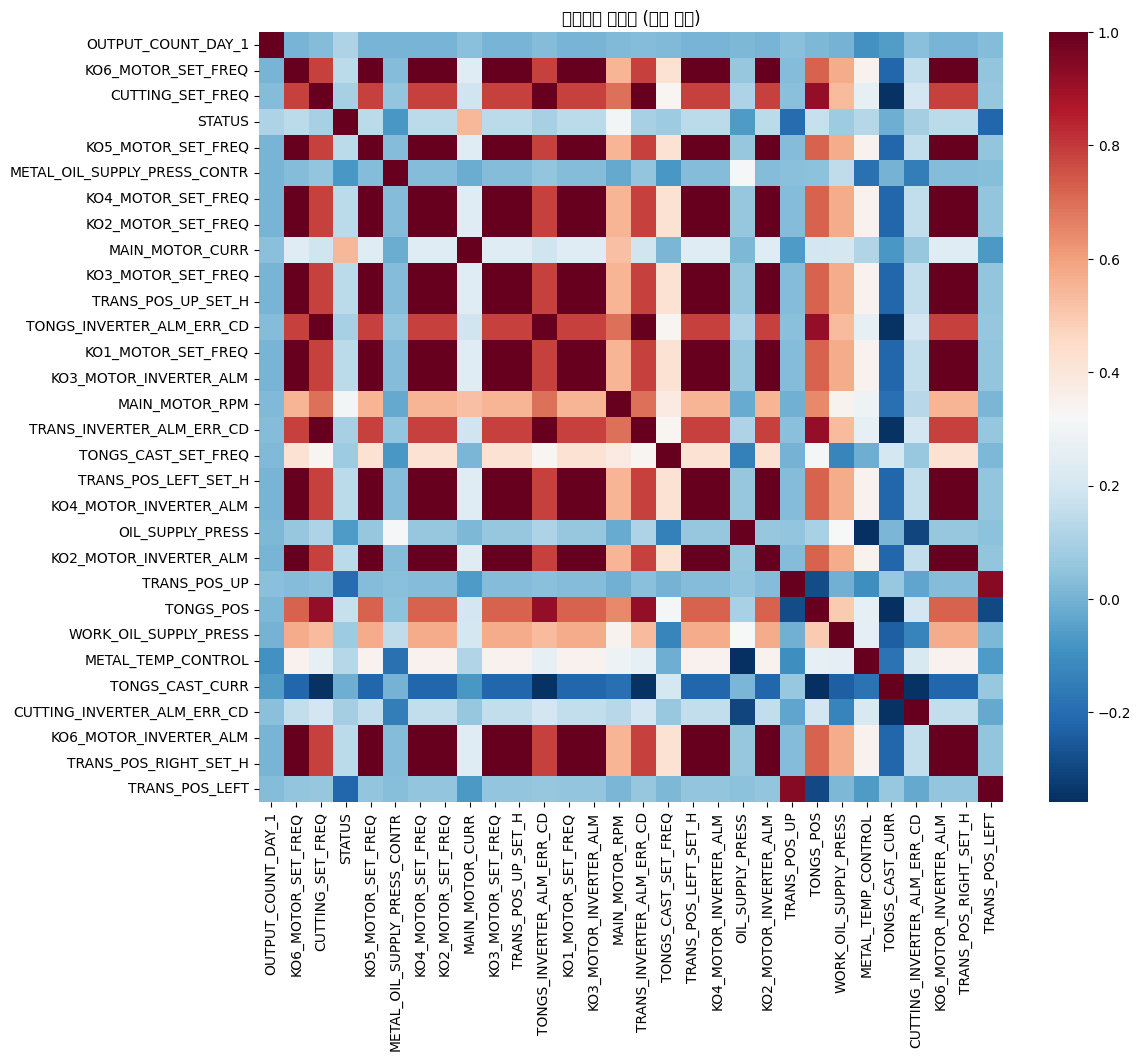

In [50]:
# ⑧ 상관계수 히트맵 (코드8 관련) — 전체 컬럼이 많으면 일부만 시각화
corr_mat = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat.iloc[:30,:30], annot=False, cmap='RdBu_r')
plt.title("상관계수 히트맵 (부분 보기)")
plt.show()

In [16]:
# ⑨ 독립변수/종속변수 분리 (코드10 관련)
# 가이드북: STATUS 컬럼이 종속변수
dataset = df.copy()
target = dataset['STATUS']
features = dataset.drop(columns=['STATUS'])

print("features shape:", features.shape, "target shape:", target.shape)
print(dataset['STATUS'].value_counts())


features shape: (579297, 43) target shape: (579297,)
STATUS
2.0    473227
0.0     99700
1.0      4075
0.5      2295
Name: count, dtype: int64


In [17]:
# ⑩ Label encoding (코드11~12 관련)
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# 가이드북의 범주화 전/후 참고: 여기서는 LabelEncoder로 숫자 레이블 생성
unique, counts = np.unique(target_encoded, return_counts=True)
print("Encoded target labels:", dict(zip(unique, counts)))

# 가이드북에서 '3을 정상', '1을 비정상'이라고 가정한 경우 -> 확인
print("Label mapping (classes_):", le.classes_)

Encoded target labels: {np.int64(0): np.int64(99700), np.int64(1): np.int64(2295), np.int64(2): np.int64(4075), np.int64(3): np.int64(473227)}
Label mapping (classes_): [0.  0.5 1.  2. ]


In [18]:
from sklearn.preprocessing import MinMaxScaler

# 숫자형 컬럼만 선택
num_cols = features.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
features_scaled_arr = scaler.fit_transform(features[num_cols])
features_scaled = pd.DataFrame(features_scaled_arr, columns=num_cols, index=features.index)

print("정규화 완료. 예시:")
display(features_scaled.iloc[:, :6].head())


정규화 완료. 예시:


,OUTPUT_COUNT_DAY_1,KO6_MOTOR_SET_FREQ,CUTTING_SET_FREQ,KO5_MOTOR_SET_FREQ,METAL_OIL_SUPPLY_PRESS_CONTR,KO4_MOTOR_SET_FREQ
0,0.394876,0.5,0.5,0.5,0.010092,0.5
1,0.394876,0.5,0.5,0.5,0.012181,0.5
2,0.394876,0.5,0.5,0.5,0.012119,0.5
3,0.394876,0.5,0.5,0.5,0.012037,0.5
4,0.394876,0.5,0.5,0.5,0.012275,0.5


In [19]:
# ⑫ 학습/검증 데이터 분리 (코드15 관련)
# stratify = target_encoded (클래스 불균형에 대응)
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target_encoded, test_size=0.25, random_state=32, stratify=target_encoded)
print("Train/Test shapes:", X_train.shape, X_test.shape)

Train/Test shapes: (434472, 42) (144825, 42)


In [20]:
# ⑬ 클래스 불균형 확인 (코드16 관련)
unique_train, counts_train = np.unique(y_train, return_counts=True)
print("Train label distribution:", display(unique_train, counts_train))

array([0, 1, 2, 3])

array([ 74775,   1721,   3056, 354920])

Train label distribution: None


In [21]:
# ⑭ XGBoost 모델 학습 (코드17 관련)
model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, random_state=32, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
print("XGBoost 학습 완료")

XGBoost 학습 완료


In [22]:
# ⑮ 예측 및 평가 (classification report, confusion matrix) (코드19 관련)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24925
           1       1.00      1.00      1.00       574
           2       1.00      1.00      1.00      1019
           3       1.00      1.00      1.00    118307

    accuracy                           1.00    144825
   macro avg       1.00      1.00      1.00    144825
weighted avg       1.00      1.00      1.00    144825

Confusion Matrix:
 [[ 24872      0      0     53]
 [     0    573      0      1]
 [     1      0   1017      1]
 [     3      0      0 118304]]


                         Feature  Importance
7                MAIN_MOTOR_CURR    0.792794
28                TRANS_POS_LEFT    0.035007
38              OUTPUT_COUNT_SUM    0.031788
29    METAL_OIL_SUPPLY_PRESS_CUT    0.022500
23            METAL_TEMP_CONTROL    0.019153
18              OIL_SUPPLY_PRESS    0.014151
32                METAL_TEMP_CUT    0.010632
20                  TRANS_POS_UP    0.010145
22         WORK_OIL_SUPPLY_PRESS    0.009370
4   METAL_OIL_SUPPLY_PRESS_CONTR    0.008408
13                MAIN_MOTOR_RPM    0.007857
0             OUTPUT_COUNT_DAY_1    0.007593
24               TONGS_CAST_CURR    0.006554
25   CUTTING_INVERTER_ALM_ERR_CD    0.005671
39                TRANS_POS_DOWN    0.005508


<Figure size 1000x600 with 0 Axes>

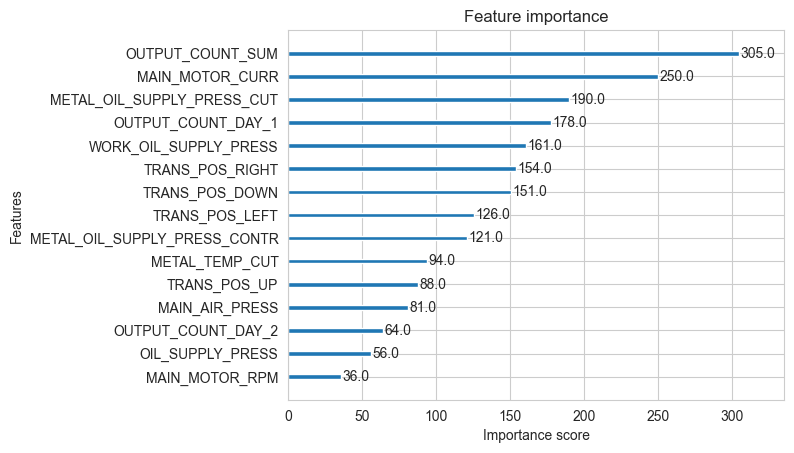

In [24]:
from xgboost import plot_importance

# 중요도 추출
importances = model.feature_importances_

# DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 상위 15개만 출력
print(importance_df.head(7))

# 시각화 (상위 15개)
plt.figure(figsize=(10,6))
plot_importance(model, max_num_features=15, importance_type='weight')  # 'gain', 'cover'도 가능
plt.show()

SHAP summary plot (샘플 1000개 기준):


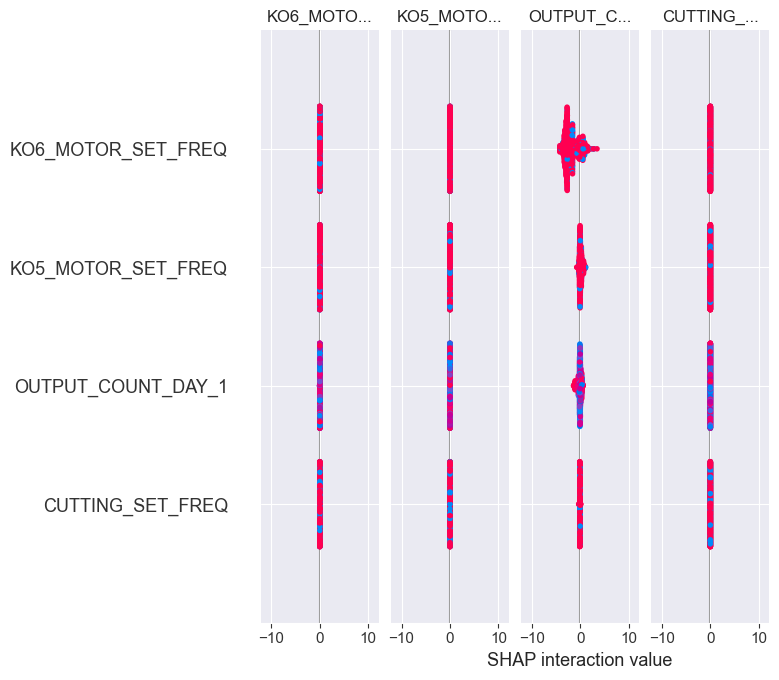

In [65]:
# ⑰ XAI: SHAP을 이용한 변수 영향도 시각화 (코드20 관련)
# (주의: shap 계산은 시간이 걸릴 수 있음)
explainer = shap.TreeExplainer(model)
# shap_values 계산 (다중클래스이면 리스트 반환)
shap_values = explainer.shap_values(X_test.iloc[:1000])  # 작은 샘플로 계산 권장
# 요약 플롯 (자동으로 multi-class handling)
print("SHAP summary plot (샘플 1000개 기준):")
if isinstance(shap_values, list):
    # multi-class: shap_values is list of arrays per class
    # show summary for class 0 as example
    shap.summary_plot(shap_values[0], X_test.iloc[:1000], show=True)
else:
    shap.summary_plot(shap_values, X_test.iloc[:1000], show=True)

In [66]:
# ⑱ 중심값(Centroid) 기반 공정 최적값 도출 (코드22 관련)
# 가이드북: 정상 상태(guide: label '3'으로 가정). 실제 label index 확인 필요.
# 여기에서는 LabelEncoder로 변환된 클래스에서 "정상"을 le.transform(['3']) 방식이 아닌,
# 가이드북 논리에 따라 원본 STATUS 값이 '3'이 정상이라면 le.transform(['3'])으로 확인.
normal_label_value = None
if '3' in le.classes_:
    normal_label_value = le.transform(['3'])[0]
    print("가이드북 기준 정상 레이블(인코딩된 값):", normal_label_value)
else:
    # 클래스 이름이 숫자형 float (예: 3.0) 일 수 있음 -> 시도
    cls_try = None
    for cls in le.classes_:
        if str(cls).startswith('3'):
            cls_try = cls
            break
    if cls_try is not None:
        normal_label_value = le.transform([cls_try])[0]
        print("유추된 정상 레이블(인코딩된 값):", normal_label_value)
    else:
        # fallback: 가장 빈도가 높은 레이블을 정상으로 가정
        vals, cnts = np.unique(target_encoded, return_counts=True)
        normal_label_value = vals[np.argmax(cnts)]
        print("정상 레이블을 최빈값으로 가정:", normal_label_value)

정상 레이블을 최빈값으로 가정: 3


In [67]:
# 정상 레코드들의 평균(centroid)
normal_df = features[target_encoded == normal_label_value]
centroid = normal_df.mean()
print("\n공정 최적값(centroid) 샘플 (상위 20개 변수):")
display(centroid.head(20))


공정 최적값(centroid) 샘플 (상위 20개 변수):


Timestamp                       2022-05-07 18:16:44.669698048
OUTPUT_COUNT_DAY_1                               32369.645332
KO6_MOTOR_SET_FREQ                                5545.524664
CUTTING_SET_FREQ                                  5288.903634
KO5_MOTOR_SET_FREQ                                5545.524664
METAL_OIL_SUPPLY_PRESS_CONTR                       260.503351
KO4_MOTOR_SET_FREQ                                5545.524664
KO2_MOTOR_SET_FREQ                                5545.524664
MAIN_MOTOR_CURR                                   4901.720177
KO3_MOTOR_SET_FREQ                                5545.524664
TRANS_POS_UP_SET_H                                3697.016442
TONGS_INVERTER_ALM_ERR_CD                         7928.948031
KO1_MOTOR_SET_FREQ                                5545.524664
KO3_MOTOR_INVERTER_ALM                               0.924254
MAIN_MOTOR_RPM                                   12224.082535
TRANS_INVERTER_ALM_ERR_CD                         7928.948031
TONGS_CA